In [12]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
data = pd.read_excel("F:/top mentor/heart attack.xlsx",sheet_name = 'heart')
desc =  pd.read_excel("F:/top mentor/heart attack.xlsx",sheet_name = 'Data Dict')

In [19]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
data.shape

(303, 14)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
desc

,Columns,Descriptions
0,Age,Age of the patient
1,Sex,Sex of the patient
2,exang,exercise induced angina (1 = yes; 0 = no)
3,ca,number of major vessels (0-3)
4,cp,Chest Pain type chest pain type
5,Value 1,typical angina
6,Value 2,atypical angina
7,Value 3,non-anginal pain
8,Value 4,asymptomatic
9,trtbps,resting blood pressure (in mm Hg)


## Data cleaning / Data wrangling / Data reprocessing 

In [22]:
## checking for duplicates
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape )

Number of duplicate rows: (1, 14)


In [23]:
 data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [24]:
## removing duplicate rows
data1 = data.drop_duplicates()

In [25]:
data1.shape

(302, 14)

In [26]:
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
## checking of null values
data1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

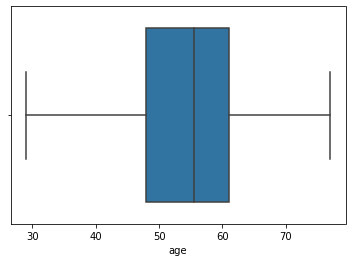

In [31]:
## detecting of outliers in the datasets
sns.boxplot(data1['age'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

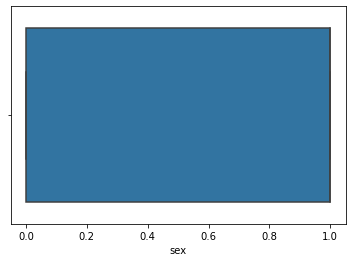

In [33]:
sns.boxplot(data1['sex'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

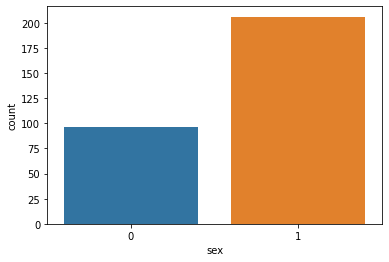

In [34]:
sns.countplot(data1['sex'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp'>

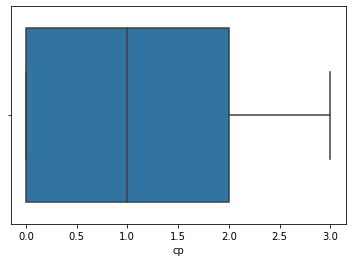

In [35]:
sns.boxplot(data1['cp'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trtbps'>

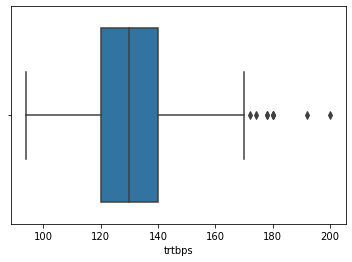

In [36]:
sns.boxplot(data1['trtbps'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

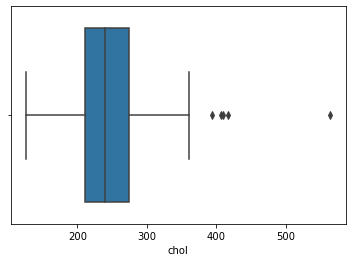

In [37]:
## we have to imput this data 
sns.boxplot(data1['chol'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalachh'>

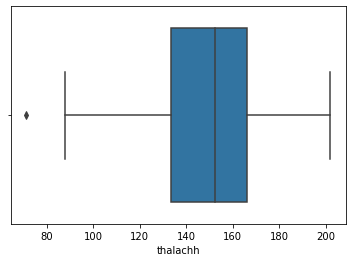

In [38]:
sns.boxplot(data1['thalachh'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

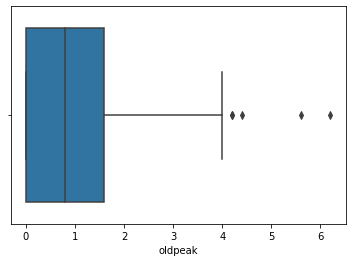

In [39]:
sns.boxplot(data1['oldpeak'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caa'>

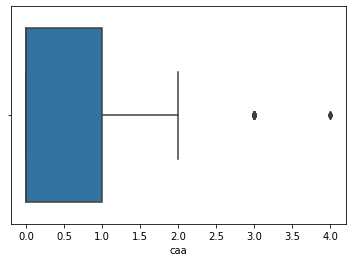

In [40]:
sns.boxplot(data1['caa'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thall'>

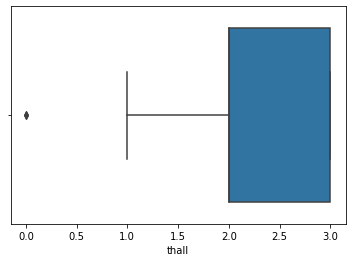

In [41]:
sns.boxplot(data1['thall'])

outliers -trtbps,chol,thalachh,old peak,caa,thall in the parameters

In [42]:
## IQR METHOD 
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)

In [43]:
IQR = Q3 - Q1
IQR

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

In [51]:
Q3

age          61.00
sex           1.00
cp            2.00
trtbps      140.00
chol        274.75
fbs           0.00
restecg       1.00
thalachh    166.00
exng          1.00
oldpeak       1.60
slp           2.00
caa           1.00
thall         3.00
output        1.00
Name: 0.75, dtype: float64

In [52]:
Q1

age          48.00
sex           0.00
cp            0.00
trtbps      120.00
chol        211.00
fbs           0.00
restecg       0.00
thalachh    133.25
exng          0.00
oldpeak       0.00
slp           1.00
caa           0.00
thall         2.00
output        0.00
Name: 0.25, dtype: float64

In [48]:
## REMOVING OUTLIERS USING IQR
data2 = data1[~((data1<(Q1 - 1.5*IQR))| (data1>(Q3 + 1.5*IQR))).any(axis = 1)] 

In [49]:
data2.shape

(228, 14)

In [50]:
## certain features which are important in predicting the heart attack
pearson_Corr = data2.corr()

In [54]:
pearson_Corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,NaN,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,NaN,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483
cp,-0.078448,-0.121648,1.000000,0.083476,-0.047258,NaN,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115
trtbps,0.266698,-0.001433,0.083476,1.000000,0.126974,NaN,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560
chol,0.172527,-0.093058,-0.047258,0.126974,1.000000,NaN,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,NaN,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641
thalachh,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,NaN,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870
exng,0.123981,0.208950,-0.351256,-0.019909,0.019446,NaN,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,NaN,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194


<AxesSubplot:>

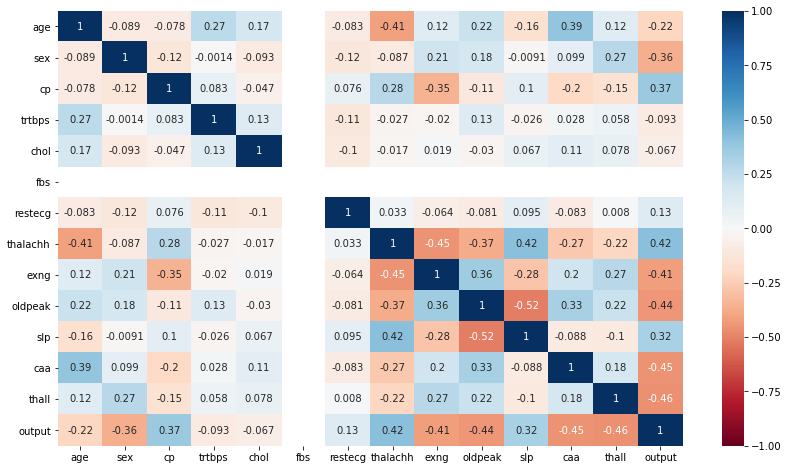

In [59]:
fig = plt.subplots(figsize =(14,8))
sns.heatmap(pearson_Corr, vmax=1, vmin = -1, annot = True,cmap= 'RdBu')

In [60]:
pearson_Corr['output']

age        -0.215120
sex        -0.363483
cp          0.371115
trtbps     -0.092560
chol       -0.067321
fbs              NaN
restecg     0.131641
thalachh    0.417870
exng       -0.414407
oldpeak    -0.439194
slp         0.323569
caa        -0.447167
thall      -0.455780
output      1.000000
Name: output, dtype: float64

## model building

In [61]:
## dropping minimum correlation scores parameters
#fbs , trtbps, chol
del data2['trtbps']

In [63]:
del data2['chol']

In [64]:
del data2['fbs']

In [65]:
data2.shape

(228, 11)

In [66]:
X = data2.drop("output",axis = 1)
y = data2['output']

In [67]:
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: output, Length: 228, dtype: int64

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [78]:
Dsc_tree =  DecisionTreeClassifier(criterion = 'entropy')

In [79]:
%%time 
model_train = Dsc_tree.fit(X_train,y_train)
print("Training complete")

Training complete
Wall time: 5.98 ms


In [80]:
pred = model_train.predict(X_test)
pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [81]:
confusion_matrix(y_test,pred)

array([[17, 11],
       [ 7, 34]], dtype=int64)

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.76      0.83      0.79        41

    accuracy                           0.74        69
   macro avg       0.73      0.72      0.72        69
weighted avg       0.74      0.74      0.74        69



In [90]:
%%time
RndF = RandomForestClassifier(criterion = 'entropy')
model_train1 = RndF.fit(X_train,y_train)
print("Training complete") 

Training complete
Wall time: 276 ms


In [91]:
pred1 = model_train1.predict(X_test)
pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [92]:
confusion_matrix(y_test,pred1)

array([[15, 13],
       [ 6, 35]], dtype=int64)

In [93]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61        28
           1       0.73      0.85      0.79        41

    accuracy                           0.72        69
   macro avg       0.72      0.69      0.70        69
weighted avg       0.72      0.72      0.72        69



<AxesSubplot:>

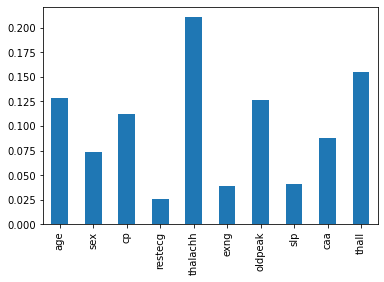

In [104]:
feat_importance = pd.Series(model_train1.feature_importances_,index = X_train.columns)
feat_importance.plot(kind = 'bar')

<AxesSubplot:>

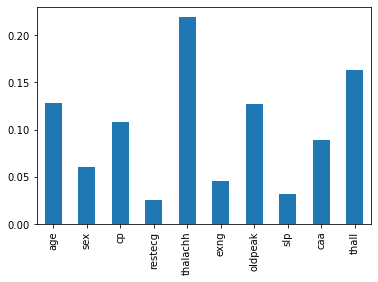

In [106]:
feat_importance = pd.Series(model_train.feature_importances_,index = X_train.columns)
feat_importance.plot(kind = 'bar')

In [107]:
X_train

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
6,56,0,1,0,153,0,1.3,1,0,2
68,44,1,1,1,170,0,0.0,2,0,2
144,76,0,2,2,116,0,1.1,1,0,2
175,40,1,0,0,114,1,2.0,1,0,3
240,70,1,2,1,112,1,2.9,1,1,3
...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,1,163,0,0.0,2,0,2
17,66,0,3,1,114,0,2.6,0,0,2
120,64,0,0,1,122,0,2.0,1,2,2
230,47,1,2,1,152,0,0.0,2,0,2


In [108]:
X_test

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
286,59,1,3,1,162,0,0.8,2,2,2
80,41,1,2,1,179,0,0.0,2,0,2
11,48,0,2,1,139,0,0.2,2,0,2
264,54,1,0,0,108,1,0.0,1,1,2
18,43,1,0,1,171,0,1.5,2,0,2
...,...,...,...,...,...,...,...,...,...,...
150,66,1,0,0,138,0,2.3,2,0,1
37,54,1,2,0,165,0,1.6,2,0,3
192,54,1,0,1,113,0,1.4,1,1,3
82,60,0,2,1,160,0,0.0,2,1,2


In [109]:
X_test.shape

(69, 10)

In [110]:
pred1.shape

(69,)